# K Nearest Neighbors

This notebook covers the implementation of the $k$-nearest neighbors algorithm, which really captures the idea of "Birds of a feather flock together". This is perfect as the dataset used in this notebook is yet again the palmer_penguins dataset! I know you missed having a penguin fun fact in the last notebook, so here's a special one (It's Sam's favorite fun fact): Penguins mate for life!

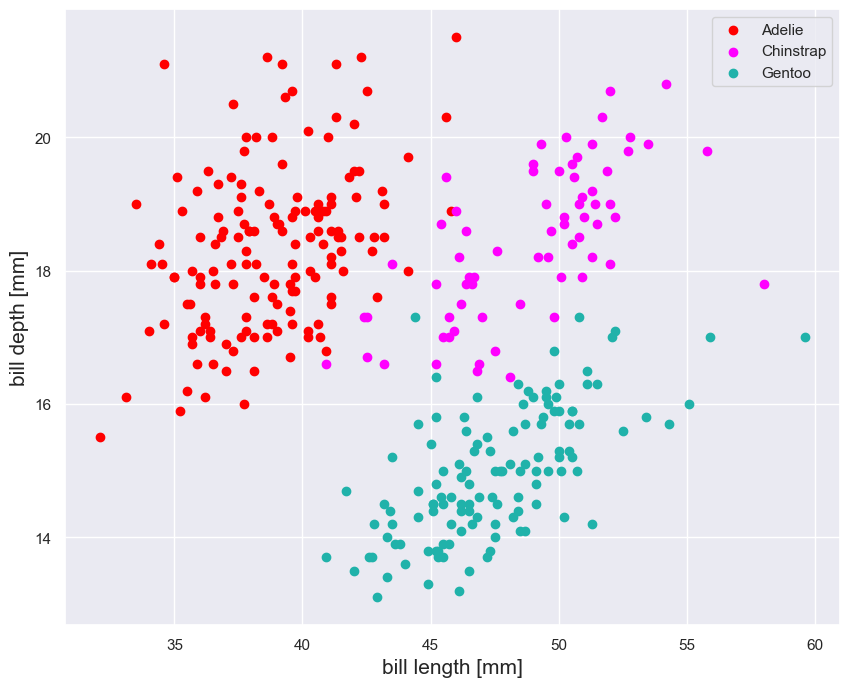

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = pd.read_csv("Datasets/palmer_penguins.csv")

# Plot the data
penguin = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguin, colors):
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm, temp_df.bill_depth_mm, c = color, label = species)
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

In the image above, similar data points are close to each other. (Most of the time.) The $k$-nearest neighbors algorithm uses this idea that similar data points are close to each other on a graph to classify data using the following steps:

1. Initialize K to your chosen number of neighbors
2. For each example in the data, calculate the distance between the query example and the current example from the data and then add the distance and the index of the example to an ordered collection
3. Sort the ordered collection of distances and indices from smallest to largest by the distances
4. Pick the first K entries from the sorted collection
5. Get the labels of the selected K entries
6. Return the mean (if regression) or mode (if classification) of the K labels

In [2]:
from sklearn.model_selection import train_test_split

X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()

y = penguins["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In this implementation the Euclidean distance defined by the following equation will be the distance measure:

In [3]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [4]:
def k_nearest_neighbors(point, training_features, training_labels, k):
    """
    Computes the k nearest neighbors of a given point using Euclidean distance.

    Parameters:
        point (array-like): The input data point to classify.
        training_features (array-like): Feature vectors from the training dataset.
        training_labels (array-like): Corresponding labels for the training features.
        k (int): The number of nearest neighbors to retrieve.

    Returns:
        list: A list of the k nearest neighbors, where each neighbor is represented 
            as [feature_vector, label, distance], sorted by ascending distance.
    """
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [5]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([43.1, 19.2]), 'Adelie', np.float64(1.118033988749895)],
 [array([43.2, 19. ]), 'Adelie', np.float64(1.1401754250991365)],
 [array([43.2, 18.5]), 'Adelie', np.float64(1.4999999999999984)],
 [array([45.6, 19.4]), 'Chinstrap', np.float64(1.5297058540778357)],
 [array([45.6, 20.3]), 'Adelie', np.float64(1.6155494421403518)]]

In [6]:
# Show the true label 
y_test[-1]

'Adelie'

Next a function to predict a target label will be defined that can be used for both classification and regression machine learning.

In [7]:
def KNN_Predict(point, training_features, training_labels, k, regression = False):
    """
    Predicts the output for a given input point using the k-Nearest Neighbors (KNN) algorithm.

    Parameters:
        point (array-like): The input data point to predict.
        training_features (array-like): Feature vectors from the training dataset.
        training_labels (array-like): Corresponding labels for the training data.
        k (int): The number of nearest neighbors to consider.
        regression (bool): If True, performs regression (returns average of neighbors' labels).
                        If False, performs classification (returns most common label).

    Returns:
        The predicted label (for classification) or predicted value (for regression).
    """
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [8]:
# Test our function 
KNN_Predict(X_test[20], X_train, y_train, 5)

'Gentoo'

In [9]:
y_test[20]

'Gentoo'

Next the classification error will be computed.

In [10]:
def classification_error(test_features, test_labels, training_features, training_labels, k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, training_features, training_labels, k)
    return error/len(test_features)

In [11]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.035398230088495575

To select the appropriate K value for a given set of data, the $k$-nearest neighbors algorithm must be run several times with different values of K to choose the K that reduces the number of errors encountered while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

In [12]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]
# play with this to make it some sort of validation thing?

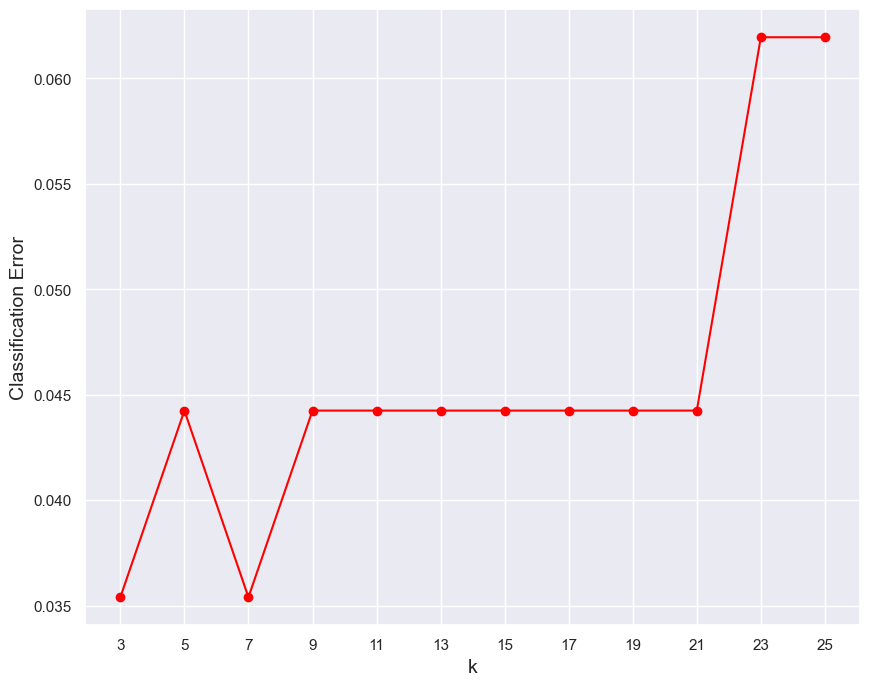

In [13]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

Some of the advantages of the $k$-nearest neighbors algorithm are that it's one of the simpler and easier algorithms to implement, there’s no need to build a model, tune several parameters, or make additional assumptions, and it is versatile since it can be used for both classification and regression!

However, one big disadvantage is that it gets significantly slower as the number of examples and/or predictors/independent variables increase.

My classification error ended up being about 3.5%, so I'm pretty satisfied with that. I thought that the choice of K graph was pretty interesting. It makes sense that since there are actually three groups that that K performed best. I think it's interesting that K = 7 performed better than K = 5. I have a couple theories as to why, and I think it comes down to the rest of the penguin data. For example, something that wasn't considered that I think could definitely affect the size of the physical features of the penguins is their sex. I wonder if there could kind of be 6 groups and K = 7 allowed them to be identified, which is why it performed well. Aside from that, I think it makes sense that the larger K got, the worse it performed because there aren't that many different features to group the penguins by, so the model was over-grouping the penguins.